如果要将上次做好的词频分析可视化，“词云图”是一个很好的选择。它的原理是，将词频高的词显示得相对更大一些。而且可以自定义背景图，让词云显示成个性化的形状。今天我们就来将上次获取的10家上市公司的“主要业务”词频文件批量生成词云图，这样一看词云图就大致了解这家公司的主要业务是什么了，放在PPT里展示也显得高大上。首先，我们导入需要用到库。若显示导入不成功，则需要用`pip install + 库名`进行安装。

In [58]:
import numpy as np # numpy数据处理库
import wordcloud # 词云库
from PIL import Image # 图像处理库，用于读取背景图片
import matplotlib.pyplot as plt # 图像展示库，以便在notebook中显示图片
from openpyxl import load_workbook #读取词频Excel文件
import os #获取词频Excel文件路径

然后获取所有的Excel词频表路径，以便后续逐一读取，并传入词云库生成词云图。再定义词频背景图，`np.array(Image.open())`打开图片后转为数组，存入`maskImage`变量。需要注意词频背景图中想要的形状的背景需要是白色的，不然无法得到想要的词云图形状。比如如下背景图片，左边的图片因为猴子的背景不是白色，做出的词云图会占满整个图片，即是一个矩形的词云图；右边的图片中，猴子的背景是白色的，做出的词云图看起来就是一只猴子的形状。
![](images\bgpic.png)

然后用`for`循环遍历所有待处理的Excel文件，逐个打开，提取其中的词和词频，存入字典`wordFreq`。然后通过`wordcloud.WordCloud()`定义词云样式。这个函数有很多参数，具体如下。我们只需要关注常用的几个即可，其它可作为了解。
```
wordcloud.WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, 'include_numbers=False', 'min_word_length=0', 'collocation_threshold=30')
```
`font_path`：字体路径。字体存在`C:\Windows\Fonts`目录，在想要的字体上点右键，选择“属性”可查看其名称，然后连同路径复制，赋给font_path即可。比如本例使用的黑体。需要注意的是，若是中文词云，需要选中文字体。
![](images\simhei.png)

`width,height`：画布的宽度和高度，单位为像素。若没设置`mask`值，才会使用此默认值400*200。
<br/>`margin`：词间距。
<br/>`ranks_only`：文档未说明。
<br/>`prefer_horizontal`：词语横排显示的概率(默认为90%，则竖排显示概率为10%)
<br/>`mask`：用于设定绘制模板，需要是一个`nd-array`（多维数组），所以在用`Image.open()`读取图片后，需要用`np.array`转换成数组。另外`mask`参数有设定的话，画布的大小会由词频背景图的大小决定。这个经常使用，因为我们更倾向于自定义模板。
<br/>`scale`：比例尺，用于放大画布的尺寸。一般使用默认值。
<br/>`color_func`：颜色函数，一般不用。
<br/>`max_words`:词云图中最多显示词的字数，设定一个值，可让那些出现次数极少的词不显示出来。
<br/>`min_font_size`:字号最小值。
<br/>`stopwords`:设置不想显示的词。
<br/>`random_state`：文档未说明。
<br/>`background_color`：词云图背景色，默认为黑色。可根据需要调整。
<br/>`max_font_size`：字号最大值。
<br/>`font_step`：字体的步长，一般使用默认。大于1的时候可提升运算速度，但匹配较差。
<br/>`mode`：当设置为"RGBA" 且`background_color`设置为"None"时可产生透明背景。
<br/>`relative_scaling`：词频对字体大小的影响度，一般使用默认。
<br/>`regexp`：正则表达式分割输入的字符。一般是先处理好才给到wordcloud，所以基本不用。
<br/>`collocations`：是否包含两个词的搭配，若使用了`generate_from_frequencies`方法则忽略此参数。一般不用。
<br/>`colormap`：每个词对应的颜色，若设置了`color_func`则忽略此参数。
<br/>`normalize_plurals`：是否移除英文复数单词末尾的s ，比如可将word和words视同为一个词，并将词频算到word头上。如果使用了`generate_from_frequencies`方法则忽略此参数。
<br/>`contour_width`：如果`mask`有设置，且`contour_width`>0，将会绘制`mask`轮廓。
<br/>`contour_color`：`mask`轮廓的颜色，默认为黑色。
<br/>`repeat`：当词不足以满足设定的`max_words`时，是否重复词或短语以使词云图上的词数量达到`max_words`
<br/>`include_numbers`：是否将数字作为词。
<br/>`min_word_length`：设置一个词包含的最少字母数量。
<br/>`collocation_threshold`：界定英文中的`bigrams`，对于中文不适用。

此例中，我们调用`wordcloud`时，设定了字体为“黑体”，使用了背景图为绘图模板，设置了最多显示词数为500，字号最大为100。然后使用`generate_from_frequencies()`从已有词频数据的字典中生成词云图。然后将词云图按公司名保存到指定路径（“词云图”文件夹）。最后用`plt.imshow()`在notebook中显示词云图。结果如下。
![](images\\result.png)

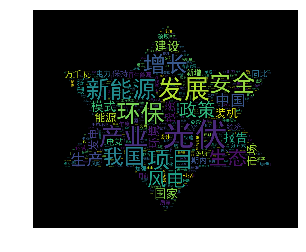

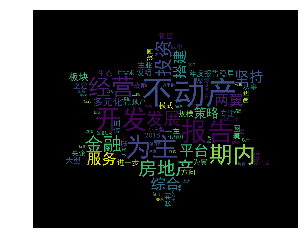

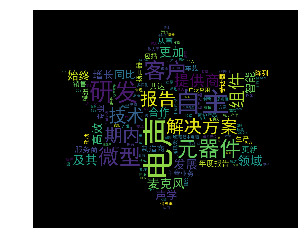

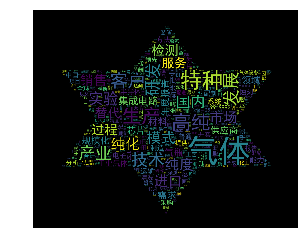

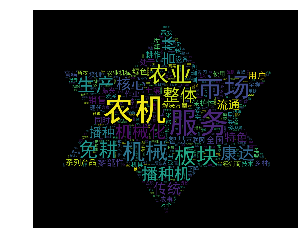

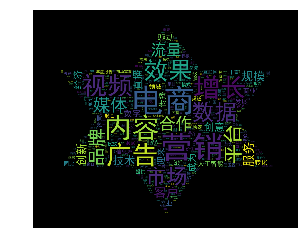

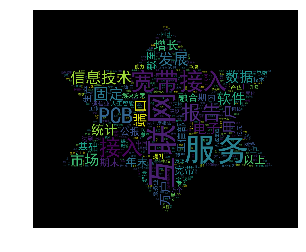

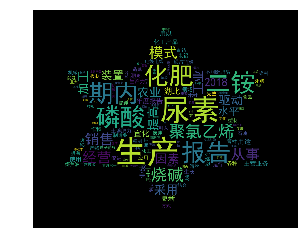

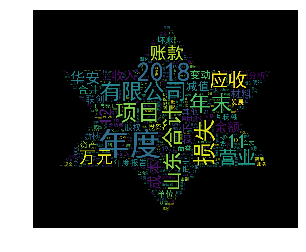

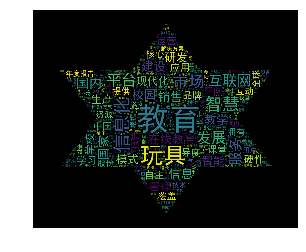

In [60]:
#将存好的Excel词频表读取成字典
path='词频'  #文件所在文件夹
files = [path+"\\"+i for i in os.listdir(path)] #获取文件夹下的文件名,并拼接完整路径
maskImage = np.array(Image.open('background.png')) # 定义词频背景图

for file in files:
    #将词频Excel文件读取为字典
    wb = load_workbook(file)
    ws = wb.active
    wordFreq = {}
    for i in range(2,ws.max_row+1):
        word = ws["A"+str(i)].value
        freq = ws["B"+str(i)].value
        wordFreq[word] = freq    
    
    #定义词云样式
    wc = wordcloud.WordCloud(
        font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体
        mask= maskImage, # 设置背景图
        max_words=500, # 最多显示词数
        max_font_size=100) # 字号最大值
    
    #生成词云图
    wc.generate_from_frequencies(wordFreq) # 从字典生成词云
    #保存图片到指定文件夹
    wc.to_file("词云图\\{}.png".format(file.split("\\")[1][:4]))
    #在notebook中显示词云图
    plt.imshow(wc) # 显示词云
    plt.axis('off') # 关闭坐标轴
    plt.show() # 显示图像

In [53]:
wordcloud.WordCloud?